<a href="https://colab.research.google.com/github/y4c6/master_thesis/blob/main/EJMR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

受夠自己亂七八糟的檔案，放過來整理。

# 這些變數名稱需要心情不錯的時候整理一次

# 套件

In [1]:
from google.colab import drive
# directory
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import json

# 準備 dataset

# 合併json檔案

## 合併檔案 ( 從 EJMRpostXX.json 到 EJMRpost_XX_XX.json )

不是每次都要跑這個

In [3]:
import glob
import json

def list_json_files(path, start_with): 
    # get a list of json files that starts with specific word 
    json_files = glob.glob(path + f'/{start_with}*.json')
    return json_files

def concat_json_files(file_paths):
    # concatenate the content of all the files in the list
    data = {'topic':[], 'posts':[]}
    for file_path in file_paths:
        with open(file_path, 'r') as f:
            file_data = json.load(f)
            data['topic'].extend(file_data['topic'])
            data['posts'].extend(file_data['posts'])
    return data

def concat_json_files_with_start(path, start_with):
    json_files = list_json_files(path, start_with)
    data = concat_json_files(json_files)
    return data

In [4]:
path = '/content/gdrive/MyDrive/論文相關材料/'
start_with = 'EJMRpost_'

data = concat_json_files_with_start(path, start_with)

In [5]:
## 確認合併成功
len(data['topic'])

220000

下面跟上面的好像可以做到一樣的事情

## 合併檔案 ( 從 EJMRpost_XX_XX.json 到 data: dict )

In [3]:
with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_1_10.json', 'r') as f:
    file1 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_11_20.json', 'r') as f:
    file2 = json.load(f)

with open('/content/gdrive/MyDrive/論文相關材料/EJMRpost_21_30.json', 'r') as f:
    file3 = json.load(f)

In [4]:
def concat_json_files(files: list):
    # concatenate the file in the lists
    data = {'topic':[], 'posts':[]}
    for file in files:
      data['topic'].extend(file['topic'])
      data['posts'].extend(file['posts'])
    return data

In [5]:
data = concat_json_files([file1, file2, file3])

In [6]:
## 確認合併成功
len(data['topic'])

220000

# 將檔案轉成表格 (從 data: dict 到 df: pd.df)

In [7]:
df = pd.DataFrame(data)
df.head(3)

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...


### check duplicated value

In [14]:
df[df.topic.duplicated()==True]

,topic,posts
11960,https://www.econjobrumors.com/topic/im-studyin...,[black Americans during the pandemic on Asian ...
20387,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
20680,https://www.econjobrumors.com/topic/why-do-so-...,[https://haas.berkeley.edu/phd/careers/job-pla...
24228,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
31255,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
...,...,...
216483,https://www.econjobrumors.com/topic/what-i%e2%...,"[1. Peter Sloterdijk, Selected Exaggerations: ..."
216809,https://www.econjobrumors.com/topic/my-convers...,"[I will be interviewing him shortly, for the C..."
217291,https://www.econjobrumors.com/topic/what-shoul...,[I will be doing a Conversations with Tyler wi...
218108,https://www.econjobrumors.com/topic/china-fact...,"[Wow. That just blew my mind., well done!!, Ar..."


I have 1,042 duplicated rows in this data.
maybe there are something wrong when i scraped,
but the number is not too big related to the total nubmber of dataset (220,000).
I think it would be okay to remove them here.

In [8]:
df = df.drop_duplicates(subset=['topic'], keep="first")

df.head()

,topic,posts
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I..."
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...
3,https://www.econjobrumors.com/topic/just-found...,[Why? Why would you ever study such a thing?]
4,https://www.econjobrumors.com/topic/karen-and-...,"[What happens next?, Mutant babies., Zhang pos..."


In [9]:
df.shape

(218958, 2)

# 準備 y, X

## 準備 y ( 利用condition()挑出 df.topic 中包含 關鍵字 的 df.posts(列) )

### 準備 df.Target ( asia+china -> china -> asia)

In [10]:
asia_target = ['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang']
china_target = ['china', 'chinese']

In [11]:
both_target = asia_target + china_target
print(both_target)

['asian', 'asia', 'korea', 'korean', 'japan', 'japanese', 'taiwan', 'taiwanese', 'hongkong', 'tibet', 'xinjiang', 'china', 'chinese']


In [12]:
# Defining all the conditions inside a function
def condition(x):
    if any( word in x for word in asia_target) and any( word in x for word in china_target): #series.str.contains('Mel').any()
        return "both"
    elif any( word in x for word in asia_target):
        return "asia"
    elif any( word in x for word in china_target):
        return "china"
    else:
        return "other"
 
# Applying the conditions
df['Target'] = df['topic'].apply(condition)
df.head(3)

,topic,posts,Target
0,https://www.econjobrumors.com/topic/rbb-or-kari,"[Whose more of a dishonest cringe dooshbag?, I...",other
1,https://www.econjobrumors.com/topic/as-ian-ame...,[https://www.nytimes.com/2022/03/06/nyregion/a...,other
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china


### 準備 df.y

In [13]:
df = df.drop(df[df['Target'] == 'other'].index)
df.head(3)

,topic,posts,Target
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china


In [23]:
df.Target.shape

(6657,)

In [24]:
df.Target[df.Target == 'both'].shape

(253,)

In [25]:
df.Target[df.Target == 'china'].shape

(4408,)

In [26]:
df.Target[df.Target == 'asia'].shape

(1996,)

In [14]:
df.groupby('Target').size()

Target
asia     1996
both      253
china    4408
dtype: int64

? Both 要怎麼處理比較好?

In [15]:
df['y'] = df['Target'].apply(lambda x: 1 if x == 'china' else 0)
df.head(3)

,topic,posts,Target,y
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,0
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1


### y的視覺化 

<Axes: title={'center': 'Ratio of labels'}, ylabel='Target'>

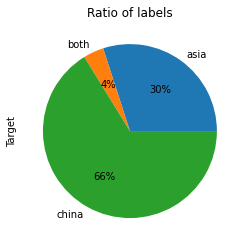

In [29]:
df.groupby('Target').size().plot(kind = 'pie',
                subplots = False,
                ylabel = 'Target',
                autopct = '%1.0f%%',
                title = 'Ratio of labels')

## 準備 X (做 NLP 前處理， Stemming/Lemmatization)

In [16]:
import nltk
nltk.download('punkt') #this is download for tonkenizer
nltk.download('wordnet')  # this is download for lemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')  # this is download for lemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# 寫 Preprocessor 的 params functions

In [17]:
import string
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text
def preprocess_text(text):
  # Lowercase all characters
  text = text.lower()

  # Remove non-English sentences
  pattern = re.compile(r'[^\x00-\x7F]+')
  text = re.sub(pattern, '', text)

  # Remove URLs
  text = re.sub(r'https?://\S+', '', text)

  # Remove digits
  text = text.translate(str.maketrans('', '', string.digits))

  # Remove punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  return text


# Define a function to tokenize and remove stopwords from text and stemmer
def stemmer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Stem the tokens
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  return tokens


# Define a function to tokenize and remove stopwords from text and lemmatize
def lemmatizer_tokenize_and_remove_stopwords(text):
  # Tokenize the article
  text_tokens = word_tokenize(text)

  # Load English stopwords
  stop_words = set(stopwords.words('english'))

  # Remove stopwords
  tokens = [token for token in text_tokens if token not in stop_words]

  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  return tokens


In [18]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
df['stemmed_tokenized'] = df['posts'].apply(lambda x: stemmer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
df['lemmatized_tokenized'] = df['posts'].apply(lambda x: lemmatizer_tokenize_and_remove_stopwords(preprocess_text( ' '.join(x) ))) 
df[['y', 'stemmed_tokenized', 'lemmatized_tokenized']].head(3)

,y,stemmed_tokenized,lemmatized_tokenized
2,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina..."
23,0,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer..."
44,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]"


## Word2Vec (和 目標字 有關的w2v)

In [34]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

In [ ]:
gensim.__version__

'3.6.0'

In [35]:
corpus_lemmatized = df['lemmatized_tokenized'].values
corpus_stemmed = df['stemmed_tokenized'].values

In [36]:
topn = 10

In [37]:
## model
word2vec_lemmatized = Word2Vec(sentences=corpus_lemmatized, size=vector_dim) 
#, window=window_size, min_count=min_count, epochs=training_epochs)

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_lemmatized.wv.most_similar(word, topn=topn), columns=['Word', 'Sims']).head())
  print('-------')

asian
             Word      Sims
0            azns  0.742632
1           white  0.738213
2   discriminated  0.735266
3             azn  0.727110
4  asianamericans  0.723568
-------
asia
        Word      Sims
0      coast  0.743176
1     africa  0.740554
2  turkestan  0.739789
3  continent  0.727882
4  southeast  0.726559
-------
korea
        Word      Sims
0     dakota  0.833116
1       racm  0.789976
2   carolina  0.723521
3  absorbing  0.712165
4        sea  0.709048
-------
korean
         Word      Sims
0    japanese  0.790914
1  vietnamese  0.727459
2       anime  0.664929
3     rooftop  0.639541
4    relegate  0.633234
-------
japan
          Word      Sims
0         buts  0.735450
1      jakarta  0.731506
2  playstation  0.717228
3        north  0.717144
4        south  0.713752
-------
japanese
         Word      Sims
0      korean  0.790914
1      german  0.757607
2  vietnamese  0.734235
3       anime  0.716392
4    alphabet  0.680953
-------
taiwan
           Word      Sim

In [38]:
## model
word2vec_stemmed = Word2Vec(sentences=corpus_stemmed, size=vector_dim) 
#, window=window_size, min_count=min_count, epochs=training_epochs)

# Because the corpus are stemmed, so my key  words also need to be stemmed
stemmer = PorterStemmer()

# Get the most similar words
for word in both_target:
  print(word)
  print(pd.DataFrame(word2vec_stemmed.wv.most_similar( stemmer.stem(word), topn=topn), columns=['Word', 'Sims']).head())
  print('-------')

asian
            Word      Sims
0            azn  0.753271
1  asianamerican  0.729429
2         hispan  0.690721
3          white  0.688823
4          whyte  0.684244
-------
asia
        Word      Sims
0  southeast  0.740897
1      coast  0.724076
2     africa  0.716428
3  turkestan  0.710794
4      middl  0.682531
-------
korea
       Word      Sims
0    dakota  0.797821
1      racm  0.745077
2       sea  0.692496
3  carolina  0.685464
4        sk  0.651708
-------
korean
        Word      Sims
0    japanes  0.739704
1  vietnames  0.701383
2       racm  0.581422
3      korea  0.569096
4  popcultur  0.564451
-------
japan
     Word      Sims
0   north  0.694120
1      sk  0.691655
2  skorea  0.678523
3   south  0.669943
4  sankyo  0.661711
-------
japanese
        Word      Sims
0     korean  0.739704
1  vietnames  0.706698
2     german  0.691044
3      hanja  0.644969
4        hst  0.635503
-------
taiwan
       Word      Sims
0   prchina  0.765010
1  independ  0.760901
2        tw 

## 得到經過 CountVectorizer 的 BOW

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# I've have the tokens, so i pass dummy function in cv.
def dummy(doc):
    return doc

# Create a matrix using CountVectorizer
vectorizer = CountVectorizer(preprocessor = dummy, 
            tokenizer = dummy, 
            strip_accents = 'ascii',
            max_features = 10000)

## 將 目標字 移出 BOW

In [20]:
# Defining all the conditions inside a function
def remove_target(x):
  return [word for word in x if word not in (asia_target + china_target)]

# Applying the conditions
df['lemmatized_cleaned'] = df['lemmatized_tokenized'].apply(remove_target)
df['stemmed_cleaned'] = df['stemmed_tokenized'].apply(remove_target)
df.head(3)

,topic,posts,Target,y,stemmed_tokenized,lemmatized_tokenized,lemmatized_cleaned,stemmed_cleaned
2,https://www.econjobrumors.com/topic/russia-chi...,[Is this the genius outcome the West was looki...,china,1,"[geniu, outcom, west, look, russian, financ, t...","[genius, outcome, west, looking, russian, fina...","[genius, outcome, west, looking, russian, fina...","[geniu, outcom, west, look, russian, financ, t..."
23,https://www.econjobrumors.com/topic/are-more-t...,"[Not even accounting for Indians., All the qua...",asia,0,"[even, account, indian, quant, club, univers, ...","[even, accounting, indian, quant, club, univer...","[even, accounting, indian, quant, club, univer...","[even, account, indian, quant, club, univers, ..."
44,https://www.econjobrumors.com/topic/reminder-c...,"[Never forget. Never forgive., .]",china,1,"[never, forget, never, forgiv]","[never, forget, never, forgive]","[never, forget, never, forgive]","[never, forget, never, forgiv]"


## 得到 lemmatized 或 stemmed 的 X

In [22]:
lemmatized_matrix = vectorizer.fit_transform(df['lemmatized_cleaned'])

# Print the matrix
print(lemmatized_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(lemmatized_matrix.toarray().shape)

(6657, 10000)


In [21]:
stemmed_matrix = vectorizer.fit_transform(df['stemmed_cleaned'])

# Print the matrix
print(stemmed_matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(stemmed_matrix.toarray().shape)

(6657, 10000)


df.Target.shape = 6657

# 真正要跑的部分

說點什麼

## 先跑一次 Lasso，將非零的字詞當作 DoubleML 中的 Treatment

In [26]:
from sklearn.linear_model import LassoCV

clf = LassoCV()
clf.fit(lemmatized_matrix, df.y)
print(clf.coef_[:10])

[-0.  0. -0. -0. -0.  0. -0.  0.  0. -0.]


In [27]:
lemmatized_lasso_coef = clf.coef_
lemmatized_D = clf.coef_[clf.coef_!=0]
print(len(lemmatized_D))

0


In [51]:
vectorizer.get_feature_names_out()[clf.coef_!=0]

array(['advers', 'africanamerican', 'angri', 'az', 'bastard', 'biologist',
       'bodybuild', 'cent', 'chino', 'chinq', 'comprehens', 'data',
       'decor', 'dementia', 'deter', 'dl', 'entrepreneur', 'equiti',
       'faulti', 'g', 'gain', 'graham', 'hahahaha', 'handl', 'happier',
       'hidden', 'hors', 'hype', 'ihr', 'implant', 'insensit', 'iran',
       'karl', 'kisdi', 'lead', 'lebanon', 'lesotho', 'less', 'mainland',
       'matthew', 'mcdonald', 'menac', 'mill', 'mindset', 'missil',
       'oecd', 'pen', 'perri', 'polyu', 'predominantli', 'present',
       'recogniz', 'reconfigur', 'regim', 'resettl', 'selfcensorship',
       'septemb', 'situat', 'somali', 'sputnik', 'statesponsor', 'sux',
       'theyd', 'toxic', 'true', 'twist', 'uniqlo', 'vil', 'warhead',
       'wat', 'wb', 'winwin', 'writer', 'wth', 'wut', 'xiamen', 'xt',
       'yanke', 'yllw', 'zhinah'], dtype=object)

In [28]:
from sklearn.linear_model import LassoCV

clf = LassoCV()
clf.fit(stemmed_matrix, df.y)
print(clf.coef_[:10])

[-0. -0.  0.  0. -0. -0. -0.  0. -0. -0.]


In [29]:
stemmed_lasso_coef = clf.coef_
stemmed_D = clf.coef_[clf.coef_!=0]
print(len(clf.coef_[clf.coef_!=0]))

97


In [35]:
stemmed_D = vectorizer.get_feature_names_out()[clf.coef_!=0]

## 跑 DoubleML (根據上面得到的 Treatment 和 Control)

In [31]:
!pip install -U DoubleML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 5.3 MB/s eta 0:00:00


In [32]:
import doubleml as dml
from sklearn.base import clone
from sklearn.linear_model import Lasso

learner = Lasso(alpha=0.1)

ml_l = clone(learner)

ml_m = clone(learner)

### 使符合套件要求的資料格式

In [60]:
len(vectorizer.get_feature_names_out())

10000

In [61]:
data_lemma = pd.concat([df.y, pd.DataFrame(lemmatized_matrix.toarray(), columns = vectorizer.get_feature_names_out())], ignore_index=True, sort=False)
data_lemma.rename(columns={0: 'y'}, inplace=True)
data_lemma = data_lemma.fillna(0)
data_lemma.head(3)

,0,aa,aapi,ab,abandon,abc,abduct,abe,abel,abenom,...,zone,zoo,zoom,zoomer,zou,zscaler,zu,zuckerberg,zuel,zurich
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(list(data_lemma.columns[np.nonzero(lasso_stem.coef_)]))

### Stem

In [34]:
data_stem = pd.concat([df.y, pd.DataFrame(stemmed_matrix.toarray(), columns = vectorizer.get_feature_names_out())], ignore_index=True, sort=False)
data_stem.rename(columns={0: 'y'}, inplace=True)
data_stem = data_stem.fillna(0)
data_stem.head(3)

,y,aa,ab,abandon,abandoned,abandoning,abc,abe,abel,abide,...,zip,ziqi,zju,zombie,zone,zoo,zoom,zoomers,zu,zuel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DoubleMLClusterData.from_arrays(x, y, d, cluster_vars, z)

In [37]:
obj_dml_data_stem = dml.DoubleMLData(data_stem,
                y_col = 'y',
                d_cols = list(stemmed_D)
                )

dml_plr_obj_stem = dml.DoubleMLPLR(obj_dml_data_stem, ml_l, ml_m)

dml_plr_obj_stem.fit();

print(dml_plr_obj_stem)

================== DoubleMLPLR Object ==================

------------------ Data summary      ------------------
Outcome variable: y
Treatment variable(s): ['able', 'achieves', 'active', 'alive', 'asianindian', 'attacking', 'au', 'bargain', 'bayesian', 'bcg', 'bigger', 'catching', 'cherish', 'chicago', 'constrained', 'contagious', 'convincing', 'count', 'crime', 'cringe', 'crucial', 'djt', 'dog', 'emerged', 'expectancy', 'faking', 'fcking', 'flees', 'fma', 'fooled', 'generalization', 'gong', 'grows', 'hoarding', 'homeless', 'hunger', 'incoherent', 'indoctrinated', 'information', 'inventor', 'ironic', 'ironically', 'jail', 'joining', 'knowingly', 'kobe', 'koreanamericans', 'like', 'literacy', 'long', 'looter', 'lq', 'merchant', 'negotiation', 'notable', 'originated', 'outsider', 'parent', 'persian', 'plate', 'pocket', 'policing', 'provides', 'quarantine', 'recording', 'restrictive', 'rigorous', 'scorer', 'sexy', 'shave', 'skin', 'stance', 'strategically', 'success', 'suggests', 'suing'

### APE 和 CI

但其實APE好像不行捏

In [38]:
print(dml_plr_obj_stem.coef)

[-0.00860227  0.00586894 -0.00429496 -0.00375804 -0.0158909  -0.01850233
 -0.01802024 -0.0151602  -0.01360154 -0.00184233 -0.05454185 -0.0002982
 -0.00483525 -0.00581932  0.0007291  -0.0057094  -0.01702484 -0.00310565
 -0.0082251   0.01029452 -0.01001834 -0.00282723 -0.00786671 -0.00112071
  0.00115194 -0.00833246 -0.00903709 -0.00564661  0.00421571 -0.0120987
  0.00418818 -0.0081847  -0.00895716  0.0080105  -0.00841383  0.00047207
 -0.00703802 -0.0272872  -0.00818918 -0.00216197 -0.02481076  0.00594162
 -0.02729404  0.00478096 -0.02450551 -0.00827075 -0.01220877 -0.00671684
  0.00084084 -0.00812599 -0.01101467 -0.00736819 -0.03446616 -0.03707513
  0.00125971 -0.00437258 -0.01450937  0.00438344 -0.00437906 -0.0182912
 -0.00098388 -0.0254217  -0.01665802  0.0029666  -0.03105699 -0.00338817
  0.00993257 -0.00111883  0.00113588 -0.0034578  -0.0093413   0.0027491
 -0.00710031 -0.00090847 -0.00452349 -0.00101397 -0.00576746 -0.00197139
  0.00056227 -0.0034105  -0.01739219 -0.02088096 -0.008

### 看看 stemming 和 lemmatization 的 CI ，用誰?

In [39]:
dml_plr_obj_stem.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
able,-0.008602,0.008565,-1.004319,0.315225,-0.025390,0.008185
achieves,0.005869,0.001825,3.216273,0.001299,0.002292,0.009445
active,-0.004295,0.003109,-1.381678,0.167071,-0.010388,0.001798
alive,-0.003758,0.001983,-1.895032,0.058088,-0.007645,0.000129
asianindian,-0.015891,0.009615,-1.652792,0.098373,-0.034735,0.002953
...,...,...,...,...,...,...
worker,-0.005544,0.005977,-0.927671,0.353578,-0.017259,0.006170
xiaopings,-0.005500,0.008676,-0.633972,0.526099,-0.022504,0.011504
xinhua,0.002936,0.005583,0.525833,0.599004,-0.008007,0.013879
yield,-0.011722,0.009107,-1.287204,0.198023,-0.029571,0.006127


# Result

In [41]:
dml_plr_obj_stem.summary.to_csv('/content/gdrive/MyDrive/Thesis_Data&Result/dml_plr_stem.csv')  